# Summary

1.  [Summary](#Summary)
2.  [Columns](#Columns)
    1.  [Summons Number](#Summons-Number)
    2.  [Plate ID](#Plate-ID) -- Drop rows with missing Plate ID's
    3.  [Registration State](#Registration-State)
        1.  [Mapping states](#Mapping-states) -- Map knowns and drop unknowns
    4.  [Plate Type](#Plate-Type)
        1.  [Mapping plate types](#Mapping-plate-types) -- Map knowns and drop unknowns
        2.  [Vehicles with multiple Plate Types!](#Vehicles-with-multiple-Plate-Types!) -- Find last known value
    5.  [Issue Date](#Issue-Date)
    6.  [Violation Code](#Violation-Code)
        1.  [Mapping violation code](#Mapping-violation-code) -- Map unknowns to `99`
    7.  [Vehicle Body Type](#Vehicle-Body-Type)
        1.  [Mapping vehicle body type](#Mapping-vehicle-body-type) -- Find last known value for the same vehicle. Map unknowns to `Unknown`
    8.  [Vehicle Make](#Vehicle-Make) -- Find last known value for the same vehicle.
    9.  [Issuing Agency](#Issuing-Agency)
        1.  [Mapping issuing agencies](#Mapping-issuing-agencies)
    10.  [Street Code1](#Street-Code1)
    11.  [Street Code2](#Street-Code2)
    12.  [Street Code3](#Street-Code3)
    13.  [Vehicle Expiration Date](#Vehicle-Expiration-Date) -- Find the last date formatted `%Y%m%d` for the same vehicle
    14.  [Violation Location](#Violation-Location) -- Drop
    15.  [Violation Precinct](#Violation-Precinct) -- Fill missing data with `Issuer Precinct`
        1.  [Violations in the same streets may have different precinct.](#Violations-in-the-same-streets-may-have-different-precinct.)
    16.  [Issuer Precinct](#Issuer-Precinct) -- Fill missing data with `Violation Precinct`
    17.  [Issuer Code](#Issuer-Code) -- Drop
    18.  [Issuer Command](#Issuer-Command) -- Drop
    19.  [Issuer Squad](#Issuer-Squad) -- Drop
    20.  [Violation Time](#Violation-Time) -- Add 'M' at the end. Time is in the format `%I%M%p`. Try to correct badly formatted values or replace them with Time First Observed.
    21.  [Time First Observed](#Time-First-Observed) -- Add 'M' at the end. Time is in the format `%I%M%p`. Try to correct badly formatted values or replace them with Violation Time.
    22.  [Violation County](#Violation-County)
        1.  [Mapping Violation County](#Mapping-Violation-County) -- Map unknowns to `Unknown`
    23.  [Violation In Front Of Or Opposite](#Violation-In-Front-Of-Or-Opposite)
        1.  [Mapping Violation In Front Of Or Opposite](#Mapping-Violation-In-Front-Of-Or-Opposite) -- Map unknowns to `Unknown`
    24.  [House Number](#House-Number) -- Map unknowns to `Unknown`
    25.  [Street Name](#Street-Name) -- Map unknowns to `Unknown`
    26.  [Intersecting Street](#Intersecting-Street) -- Map unknowns to `NULL`
    27.  [Date First Observed](#Date-First-Observed) -- Badly formatted (e.g., 20,190,625 => 2019/06/25). Fill missing value with `Issue Date`
    28.  [Law Section](#Law-Section)
    29.  [Sub Division](#Sub-Division) -- Fill missing data with `Unknown`
    30.  [Violation Legal Code](#Violation-Legal-Code) -- Drop
    31.  [Days Parking In Effect](#Days-Parking-In-Effect) -- Drop
    32.  [From Hours In Effect](#From-Hours-In-Effect) -- Drop
    33.  [To Hours In Effect](#To-Hours-In-Effect) -- Drop
    34.  [Vehicle Color](#Vehicle-Color)
        1.  [Mapping vehicle colors](#Mapping-vehicle-colors) -- Find last known value for the same vehicle. `Unknown` if unknown.
    35.  [Unregistered Vehicle?](#Unregistered-Vehicle?) -- Drop
    36.  [Vehicle Year](#Vehicle-Year) -- Find last known value for the same vehicle. Null if unknown
    37.  [Meter Number](#Meter-Number) -- Drop
    38.  [Feet From Curb](#Feet-From-Curb) -- Drop
    39.  [Violation Post Code](#Violation-Post-Code) -- Drop
    40.  [Violation Description](#Violation-Description) -- Drop
    41.  [No Standing or Stopping Violation](#No-Standing-or-Stopping-Violation) -- Drop
    42.  [Hydrant Violation](#Hydrant-Violation) -- Drop
    43.  [Double Parking Violation](#Double-Parking-Violation) -- Drop

In [134]:
import numpy as np
import pandas as pd

In [135]:
df = pd.read_csv("./Dataset/Parking_Violations_Issued_-_Fiscal_Year_2020.csv", sep=';')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,18,20,22,23,26,27,29,30,31,32,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [136]:
df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1447152396,JET2661,NY,PAS,06/28/2019,21,SDN,BMW,P,27390,...,GRY,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
1,1447152402,JCV6523,NY,PAS,06/28/2019,20,SDN,TOYOT,P,36290,...,GY,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
2,1447152554,GMK6954,NY,PAS,06/16/2019,19,SUBN,BMW,P,36270,...,BLK,0.0,2019,-,0,NaN,NaN,NaN,NaN,NaN
3,1447152580,JGX1641,NY,PAS,06/24/2019,19,SDN,AUDI,P,36270,...,BLK,0.0,2015,-,0,NaN,NaN,NaN,NaN,NaN
4,1447152724,GDM8069,NY,COM,07/06/2019,48,NaN,NaN,P,31190,...,NaN,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN


In [137]:
len(df)

4984034

# Columns

In [138]:
df.dtypes

Summons Number                         int64
Plate ID                              object
Registration State                    object
Plate Type                            object
Issue Date                            object
Violation Code                         int64
Vehicle Body Type                     object
Vehicle Make                          object
Issuing Agency                        object
Street Code1                           int64
Street Code2                           int64
Street Code3                           int64
Vehicle Expiration Date                int64
Violation Location                   float64
Violation Precinct                     int64
Issuer Precinct                        int64
Issuer Code                            int64
Issuer Command                        object
Issuer Squad                          object
Violation Time                        object
Time First Observed                   object
Violation County                      object
Violation 

## Summons Number

**No missing values**

In [139]:
df['Summons Number'].isna().any()

False

**No duplicates**

In [140]:
df['Summons Number'].duplicated().any()

False

## Plate ID

**Very few missing values**  
Action: **Drop rows with missing Plate ID's**

In [141]:
df['Plate ID'].isna().any()

True

In [142]:
len(df[df['Plate ID'].isna()])

92

**A lot of duplicate values, which is okay since multiple violations can be linked with one car. However, we need to make sure that all vehicle attributes are the same of the same plate id.**

In [143]:
df['Plate ID'].duplicated().any()

True

In [144]:
len(df[df['Plate ID'].duplicated()])

3082197

**NOTE**: Two different vehicles from different registration states can have the same plate id. Also, two vehicles within the same state can have the same plate id if they have differeent body type.  
So, a combination of `Plate ID`, `Registration State`, and `Vehicle Body Type` should be a good identifier for vehicles (e.g., concatinating the three columns).

In [145]:
vehicles_df = df[
    ['Plate ID', 'Registration State', 'Plate Type', 'Vehicle Body Type',
    'Vehicle Make', 'Vehicle Color', 'Vehicle Year', 'Unregistered Vehicle?']
].drop_duplicates()

In [146]:
vehicles_df[vehicles_df['Plate ID'].duplicated(keep=False)].sort_values('Plate ID')

,Plate ID,Registration State,Plate Type,Vehicle Body Type,Vehicle Make,Vehicle Color,Vehicle Year,Unregistered Vehicle?
2785232,0001CCD,DP,PAS,SUBN,CHEVR,BK,0,0.0
1900386,0001CCD,DP,PAS,SUBN,CHEVR,BLACK,0,NaN
673303,0001FJD,DP,PAS,4DSD,BMW,BLACK,0,NaN
4071968,0001FJD,DP,PAS,SDN,BMW,BK,0,0.0
2228483,0001FJD,GV,PAS,4DSD,BMW,BLACK,0,NaN
...,...,...,...,...,...,...,...,...
4382154,NaN,NY,MOT,MCY,YAMAH,BLACK,0,NaN
4383892,NaN,NY,999,VAN,FORD,WHITE,0,NaN
4383995,NaN,NY,MCL,MCY,DUCAT,GREY,2003,NaN
4430881,NaN,SD,PAS,4DSD,ME/BE,WHITE,0,NaN


In [147]:
df['Vehicle ID'] = df['Registration State'] + df['Plate ID'] + df['Vehicle Body Type']

## Registration State

**No missing values**

In [148]:
df['Registration State'].isna().any()

False

**A lot of duplicate values, which is obviously okay.**

In [149]:
df['Registration State'].duplicated().any()

True

In [150]:
len(df[df['Registration State'].duplicated()])

4983967

In [151]:
df['Registration State'].unique()

array(['NY', 'ME', '99', 'PA', 'FL', 'NJ', 'NC', 'TX', 'OH', 'OK', 'SC',
       'OR', 'AL', 'ON', 'IL', 'MS', 'VT', 'NH', 'MN', 'IN', 'CT', 'MI',
       'TN', 'NB', 'ID', 'MA', 'IA', 'CA', 'RI', 'QB', 'VA', 'WA', 'AR',
       'GV', 'MO', 'LA', 'GA', 'DC', 'NV', 'NM', 'AZ', 'UT', 'WI', 'MD',
       'KS', 'CO', 'WV', 'BC', 'DE', 'SD', 'NE', 'AK', 'DP', 'NS', 'PR',
       'FO', 'ND', 'HI', 'AB', 'MT', 'MB', 'WY', 'KY', 'PE', 'MX', 'SK',
       'NT'], dtype=object)

### Mapping states
We need to make sure that all states are valid. We will use the States dataset for that.

In [152]:
df_state = pd.read_csv('Dataset/ACRIS_-_State_Codes.csv', delimiter=';', usecols=['STATE CODE', 'DESCRIPTION'], index_col='STATE CODE')

In [153]:
df_state.head()

,DESCRIPTION
STATE CODE,
AL,ALABAMA
AK,ALASKA
AZ,ARIZONA
AR,ARKANSAS
CA,CALIFORNIA


In [154]:
df_with_mapped_states = df.join(df_state, on='Registration State')

**Very few unknown states**.  
Action: *For known states:* Map to the name of the state. *For unknown states:* **DROP**; because we use the state for the vehicle id.

In [155]:
df_with_mapped_states[df_with_mapped_states['DESCRIPTION'].isna()]['Registration State'].unique()

array(['99', 'ON', 'NB', 'QB', 'GV', 'BC', 'DP', 'NS', 'PR', 'FO', 'AB',
       'MB', 'PE', 'MX', 'SK', 'NT'], dtype=object)

## Plate Type

**No missing values**

In [156]:
df['Plate Type'].isna().any()

False

**A lot of duplicate values, which is obviously okay.**

In [157]:
df['Plate Type'].duplicated().any()

True

In [158]:
len(df[df['Plate Type'].duplicated()])

4983949

In [159]:
df['Plate Type'].unique()

array(['PAS', 'COM', '999', 'ORG', 'OMT', 'SRF', 'OMS', 'NYS', 'PSD',
       'IRP', 'CMB', 'RGL', 'DLR', 'HIS', 'SPO', 'MOT', 'APP', 'VAS',
       'OML', 'HAM', 'OMV', 'SRN', 'HIR', 'TOW', 'PHS', 'MCL', 'RGC',
       'BOB', 'CSP', 'ITP', 'AMB', 'AGR', 'LTR', 'OMR', 'TRC', 'NLM',
       'TRL', 'MED', 'SCL', 'LMB', 'LMC', 'TRA', 'SEM', 'OMO', 'STA',
       'NYC', 'BOT', 'OMF', 'SPC', 'LUA', 'AYG', 'ORC', 'NYA', 'ARG',
       'GSM', 'STG', 'CCK', 'ATV', 'LMA', 'FPW', 'JCL', 'SOS', 'SUP',
       'CHC', 'CMH', 'ORM', 'AGC', 'USS', 'THC', 'CBS', 'CLG', 'JSC',
       'HSM', 'VPL', 'CME', 'HOU', 'ATD', 'HAC', 'PPH', 'JWV', 'USC',
       'GAC', 'SNO', 'FAR', 'JCA'], dtype=object)

### Mapping plate types
We need to make sure that all plate types are valid. We will use the Plate Types dataset for that.

In [160]:
df_plate_types = pd.read_json('Dataset/plate_type.json').set_index('Class Code')

In [161]:
df_plate_types.head()

,Class Description
Class Code,
AGC,AGRICULTURE
AGR,AGRICULTURAL
AMB,AMBULANCE
ARG,AIR NATIONAL GUARD
ATD,ATV DEALER


In [162]:
df_with_mapped_plate_types = df.join(df_plate_types, on='Plate Type')

**Very few unknown plate types**.  
Action: *For known plate types:* Map to the name of the plate type. *For unknown plate types:* **DROP**; because we use it for the vehicle id.

In [163]:
df_with_mapped_plate_types[df_with_mapped_plate_types['Class Description'].isna()]['Plate Type'].unique()

array(['999', 'CMB', 'APP'], dtype=object)

### Vehicles with multiple Plate Types!  
Action: Rely on the last known value.

In [164]:
df_veh_plate = df_with_mapped_plate_types[['Vehicle ID', 'Class Description']].dropna(subset=['Vehicle ID']).drop_duplicates()

In [165]:
df_veh_plate[df_veh_plate['Vehicle ID'].duplicated(keep=False)].sort_values(by=['Vehicle ID'])

,Vehicle ID,Class Description
1507347,990014MNDSDN,PASSENGER
1533760,990014MNDSDN,NaN
1530931,9912226MGVAN,COMMERCIAL
1512474,9912226MGVAN,PASSENGER
1537907,9916242TCDELV,TRANSPORTER
...,...,...
1087800,NYZHF12994DSD,PASSENGER
4096683,NYZIPZAP4DSD,SPECIAL REGISTRATION FEE
4561978,NYZIPZAP4DSD,PASSENGER
3331195,NYZUZUPTLSSUBN,PASSENGER


## Issue Date

**No missing values**

In [166]:
df['Issue Date'].isna().any()

False

In [167]:
df['Issue Date'].head()

0    06/28/2019
1    06/28/2019
2    06/16/2019
3    06/24/2019
4    07/06/2019
Name: Issue Date, dtype: object

**All the dates are in the same format %m/%d/%Y**

In [168]:
issue_date_df = pd.to_datetime(df['Issue Date'], errors='coerce', format='%m/%d/%Y')

In [169]:
issue_date_df.isna().any()

False

## Violation Code

**No missing values**

In [170]:
df['Violation Code'].isna().any()

False

In [171]:
df['Violation Code'].unique()

array([21, 20, 19, 48, 46, 40, 78, 41, 14, 74, 17, 61, 70, 10, 98, 51, 50,
       67, 24, 63, 71, 60, 45, 83, 43, 16, 31, 37, 99, 18, 42, 62, 53, 27,
       38, 96, 68, 66, 75, 52, 90, 77,  9, 91, 80, 34, 11,  5,  4, 87, 64,
       39, 13, 72, 85, 97, 56, 92,  6, 49, 95, 26, 36, 47, 79, 84, 81, 12,
       54, 73,  7, 94, 69, 22,  0, 33,  8, 89,  1, 82, 30, 35, 32, 23, 59,
        3, 86, 88, 44, 57, 76, 55, 65,  2, 25, 29, 15, 58, 93])

### Mapping violation code
We need to make sure that all violation codes are valid. We will use the Violation Code dataset for that.

In [172]:
df_violation_codes = pd.read_csv('Dataset/ParkingViolationCodes_Nov_2018.csv', index_col='VIOLATION CODE', usecols=['VIOLATION CODE', 'VIOLATION DESCRIPTION'])

In [173]:
df_violation_codes.head()

,VIOLATION DESCRIPTION
VIOLATION CODE,
1,FAILURE TO DISPLAY BUS PERMIT
2,NO OPERATOR NAM/ADD/PH DISPLAY
3,UNAUTHORIZED PASSENGER PICK-UP
4,BUS PARKING IN LOWER MANHATTAN
5,BUS LANE VIOLATION


In [174]:
df_with_mapped_violation_codes = df.join(df_violation_codes, on='Violation Code')

**Very few unknown violation codes**.  
Action: *For known violation codes:* Map to the name of the violation code. *For unknown violation codes:* Map to 99 which is `other`.

In [175]:
df_with_mapped_violation_codes[df_with_mapped_violation_codes['VIOLATION DESCRIPTION'].isna()]['Violation Code'].unique()

array([95, 94,  0])

## Vehicle Body Type

**Few missing values**

In [176]:
df['Vehicle Body Type'].isna().any()

True

In [177]:
len(df[df['Vehicle Body Type'].isna()])

18811

In [178]:
df['Vehicle Body Type'].unique()

array(['SDN', 'SUBN', nan, ..., 'SNOW', 'BUS.', '4HT'], dtype=object)

### Mapping vehicle body type
We need to make sure that all body type are valid. We will use the Vehicle Body Type dataset for that.

In [179]:
df_vehicle_body_type = pd.read_json('Dataset/vehicle_body_type.json').set_index('Body Code')

In [180]:
df_vehicle_body_type.head()

,Body Style Description
Body Code,
FIRE,FIRE TRUCK
CONV,CONVERTIBLE
SEDN,SEDAN
SUBN,SUBURBAN
4DSD,FOUR-DOOR SEDAN


In [181]:
df_with_mapped_df_vehicle_body_types = df.join(df_vehicle_body_type, on='Vehicle Body Type')

**A lot of unknown vehicle body types**.  
Action: *For known vehicle body types:* Map to the name of the body type. *For unknown vehicle body types:* Map to 'Unknown'. Also, one good step is to try to find the latest non-null vehicle body type for the same vehicle.

In [182]:
len(df_with_mapped_df_vehicle_body_types[df_with_mapped_df_vehicle_body_types['Body Style Description'].isna()]['Vehicle Body Type'].unique())

969

## Vehicle Make

**Few missing values**.  
Action: Always try to find the latest non-null value for the same vehicle.

In [183]:
df['Vehicle Make'].isna().any()

True

In [184]:
len(df[df['Vehicle Make'].isna()])

26928

In [185]:
df['Vehicle Make'].unique()

array(['BMW', 'TOYOT', 'AUDI', ..., 'LNDRO', 'YOUNG', 'AU/CA'],
      dtype=object)

## Issuing Agency

**No missing values**

In [186]:
df['Issuing Agency'].isna().any()

False

In [187]:
df['Issuing Agency'].unique()

array(['P', 'X', 'D', 'F', 'H', 'C', 'T', 'K', 'O', 'S', 'V', 'E', 'B',
       'Z', 'A', '1', 'M'], dtype=object)

### Mapping issuing agencies
We need to make sure that all issuing agencies are valid. We will use the Issuing Agency dataset for that.

In [188]:
df_issuing_agency = pd.read_json('Dataset/issuing_agencies.json').set_index('Code')

In [189]:
df_issuing_agency.head()

,Agency
Code,
A,PORT AUTHORITY
B,TRIBOROUGH BRIDGE AND TUNNEL POLICE
C,CON RAIL
D,DEPARTMENT OF BUSINESS SERVICES
E,BOARD OF ESTIMATE


In [190]:
df_with_mapped_df_issuing_agency = df.join(df_issuing_agency, on='Issuing Agency')

**No unknown issuing Agency**.  

In [191]:
df_with_mapped_df_issuing_agency[df_with_mapped_df_issuing_agency['Agency'].isna()]['Issuing Agency'].unique()

array([], dtype=object)

In [192]:
pd.value_counts(df_with_mapped_df_issuing_agency['Agency']).plot.bar()

## Street Code1

**No missing values**

In [193]:
df['Street Code1'].isna().any()

False

In [194]:
df['Street Code1'].unique()

array([27390, 36290, 36270, ..., 65365, 37745, 47260])

## Street Code2

**No missing values**

In [195]:
df['Street Code2'].isna().any()

False

In [196]:
df['Street Code2'].unique()

array([36290, 27390, 11710, ..., 27830, 11920, 15670])

## Street Code3

**No missing values**

In [197]:
df['Street Code3'].isna().any()

False

In [198]:
df['Street Code3'].unique()

array([36350, 13113, 27390, ..., 12570, 27102, 36800])

## Vehicle Expiration Date

**No missing values**

In [199]:
df['Vehicle Expiration Date'].isna().any()

False

In [200]:
df['Vehicle Expiration Date'].head()

0    20210306
1    20210109
2    20190720
3    20210408
4    20210109
Name: Vehicle Expiration Date, dtype: int64

**All the dates are in the same format %Y%m%d.**

In [201]:
vehicle_expiration_date_df = pd.to_datetime(df['Vehicle Expiration Date'], errors='coerce', format='%Y%m%d')

In [202]:
vehicle_expiration_date_df.count()

2418799

**However, there are some bad formatted values.**  
Action: Rely on the latest known value.

In [203]:
df['Vehicle Expiration Date'][vehicle_expiration_date_df.isna()]

9                 0
14                0
17                0
21                0
36                0
             ...   
4984025    88880088
4984026    88880088
4984029    88880088
4984030    20190088
4984032    20190088
Name: Vehicle Expiration Date, Length: 2565235, dtype: int64

## Violation Location

**A lot of missing values**  
Action: **DROP THIS FEATURE; because it is exactly the same as Violation Precinct. See Violation Precinct**

In [204]:
df['Violation Location'].isna().any()

True

In [205]:
len(df[df['Violation Location'].isna()])

1474186

## Violation Precinct

**A lot of missing values (represented as 0). There are exactly the same number of missing values as Violation Location. In fact, these two features are exactly the same as demonstrated below.**  
Action: Fill missing values with the value of `Issuer Precinct` -if it exists-; since `Issuer Precinct` and `Violation Precinct` are almost the same (see `Issuer Precinct` down below).

In [206]:
df['Violation Precinct'].isna().any()

False

In [207]:
len(df[df['Violation Precinct'] == 0])

1474186

**Violation Precinct and Violation Location are exactly the same**

Number of Violation Location

In [208]:
len(df[df['Violation Location'].notna()])

3509848

Number of Violation Location which are the same as Violation Precinct

In [209]:
len(df[df['Violation Location'].notna()][df['Violation Precinct'] == df['Violation Location']])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


3509848

In [210]:
df['Violation Precinct'].unique()

array([ 26,  28,  32,   5, 120,   1,  78,  60,  72,  71,  70,  69,  68,
        67,  63,  46,   0,  40,  45,  49,  42,  50,  47,  48,  44,  13,
        18,   9,   7,  17,  94,  77, 122, 123, 121, 110, 112, 104, 109,
       111,  41, 114, 107,  79,  81, 801,  73,  75, 100,  19,  90,  88,
       113, 106,   6,  10,  61,  20, 115,  84,  33, 808, 108,  23,  43,
        30,  52, 105,  76,  83,   2, 103, 117,  14, 101, 102,  66,  62,
        95,  25,  24, 163,  34,  16, 806,   3,  87,  74,   4,  57,  36,
        80, 804,  91, 116,  65,  31,  29,  39,  53,  51, 118, 119,  56,
        82,  27,  98, 401, 407,  21,  22,  12,  15,  38, 150,   8,  54,
       705,  11,  97,  89,  85,  86, 901, 125, 126, 127,  59, 747,  64,
        99,  93, 409, 617, 425, 214, 803, 802, 400,  96, 210, 132, 136,
        92,  37, 701, 128, 200, 831,  58, 671, 170, 946, 173, 172, 143,
        35, 129, 180, 614, 807, 161, 819, 302, 160, 670, 144, 221, 404,
       560, 402])

### Violations in the same streets may have different precinct.

In [211]:
all_streets = df['Street Code1'].append(df['Street Code2']).append(df['Street Code3']).unique()
s_all_streets = pd.Series(all_streets)

In [212]:
df_location = df[['Street Code1', 'Street Code2', 'Street Code3', 'Violation Precinct', 'House Number']].drop_duplicates()
df_location_with_same_streets = df_location[df_location.duplicated(subset=['Street Code1', 'Street Code2', 'Street Code3'], keep=False)].sort_values(['Street Code1', 'Street Code2', 'Street Code3'], ascending=False)
df_location_with_same_streets.head(80)

,Street Code1,Street Code2,Street Code3,Violation Precinct,House Number
883306,98260,97940,8630,44,1460
4839458,98260,97940,8630,46,1530
3243035,97950,20490,12560,26,454
4803325,97950,20490,12560,26,272
791249,97890,30497,98270,17,488
...,...,...,...,...,...
252756,96131,14580,14630,63,2033
831087,96131,14580,14630,63,2075
1322998,96131,14580,14630,63,2069
1322999,96131,14580,14630,63,2067


## Issuer Precinct

**A lot of missing values (represented as 0).**  
Action: Fill missing values with the value of `Violation Precinct` -if it exists-; since `Issuer Precinct` and `Violation Precinct` are almost the same as demonstrated below.

In [213]:
df['Issuer Precinct'].isna().any()

False

In [214]:
len(df[df['Issuer Precinct'] == 0])

1590777

`Issuer Precinct` and `Violation Precinct` are mostly the same.

In [215]:
len(df[df['Violation Precinct'] == df['Issuer Precinct']])

4713371

## Issuer Code

**A lot of missing values (represented as 0).**  
Action: Delete this feature since it is not really useful. It represents the code of the issuer (e.g. police officer). We have Issuing Agency which is much more general and useful.

In [216]:
df['Issuer Code'].isna().any()

False

In [217]:
len(df[df['Issuer Code'] == 0])

1439821

## Issuer Command

**A lot of missing values.**  
Action: Delete this feature since it is related to the issuer which we already decided to deleted (see Issuer Code).

In [218]:
df['Issuer Command'].isna().any()

True

In [219]:
len(df[df['Issuer Command'].isna()])

1436650

## Issuer Squad

**A lot of missing values.**  
Action: Delete this feature since it is related to the issuer which we already decided to deleted (see Issuer Code).

In [220]:
df['Issuer Squad'].isna().any()

True

In [221]:
len(df[df['Issuer Squad'].isna()])

1436888

## Violation Time

**Very few missing values**

In [222]:
df['Violation Time'].isna().any()

True

In [223]:
len(df[df['Violation Time'].isna()])

124

In [224]:
df['Violation Time'].head()

0    1000A
1    1011A
2    0107A
3    0300A
4    0653A
Name: Violation Time, dtype: object

**Violation Time is *mainly* in this format: %I%M then either A for AM or P for PM.**  
Python have a *format code* for AM and PM but does not understand A and P. So to solve this, I concatnated an 'M' to the time string.

In [225]:
violation_time_df = pd.to_datetime(df['Violation Time'] + 'M', errors='coerce', format='%I%M%p')

However, there are a lot of bad formatted values.  
    Action: we could replace these values with `Time First Observed` values if exist, or we could try to get the correct time. For example, the time '0049A' is badly formatted but we could assume that it was written in 24hs format, so we converted to => 12:49AM. 

In [226]:
df[violation_time_df.isna()]['Violation Time']

10         0049A
11         0046A
166        0055A
234        0040A
410        0015A
           ...  
4977373    0001A
4977374    0046A
4978206    0015A
4978207    0016A
4978208    0043A
Name: Violation Time, Length: 20789, dtype: object

Handling values which are written in 24hs format

In [227]:
violation_time_df[violation_time_df.isna()] = pd.to_datetime(df[violation_time_df.isna()]['Violation Time'].str.strip('AaPp'), errors='coerce', format='%H%M')

Number of NaN values droppeed from 20789 to 171!

In [228]:
violation_time_df[violation_time_df.isna()]

573       NaT
699       NaT
840       NaT
908       NaT
3309      NaT
           ..
4074219   NaT
4085461   NaT
4086928   NaT
4087112   NaT
4303213   NaT
Name: Violation Time, Length: 171, dtype: datetime64[ns]

## Time First Observed

**Mostly missing values!**  
Action: Fill with values from `Violation Time`.

In [229]:
df['Time First Observed'].isna().any()

True

In [230]:
len(df[df['Time First Observed'].isna()])

4744777

In [231]:
df[df['Time First Observed'].notna()]['Time First Observed'].head()

50    0800A
51    0740A
52    1119A
53    1035A
54    1140A
Name: Time First Observed, dtype: object

In [232]:
time_first_observed_df = pd.to_datetime(df['Time First Observed'] + 'M', errors='coerce', format='%I%M%p')

There are a lot of bad formatted values.  
    Action: we could replace these values with `Violation Time` values if exist, or we could try to get the correct time. For example, the time '0049A' is badly formatted but we could assume that it was written in 24hs format, so we converted to => 12:49AM. 

In [233]:
df[time_first_observed_df.isna()]['Time First Observed']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
4984029    NaN
4984030    NaN
4984031    NaN
4984032    NaN
4984033    NaN
Name: Time First Observed, Length: 4745606, dtype: object

Handling values which are written in 24hs format

In [234]:
time_first_observed_df[time_first_observed_df.isna()] = pd.to_datetime(df[time_first_observed_df.isna()]['Time First Observed'].str.strip('AaPp'), errors='coerce', format='%H%M')

Number of NaN values barely droppeed

In [235]:
time_first_observed_df[time_first_observed_df.isna()]

0         NaT
1         NaT
2         NaT
3         NaT
4         NaT
           ..
4984029   NaT
4984030   NaT
4984031   NaT
4984032   NaT
4984033   NaT
Name: Time First Observed, Length: 4744779, dtype: datetime64[ns]

We could use `Time First Observed` values to fill NaN values of `Violation Time`

In [236]:
violation_time_df[violation_time_df.isna()] = df[violation_time_df.isna()]['Time First Observed']

Number of NaN values of `Violation Time` barely droppeed

In [237]:
violation_time_df[violation_time_df.isna()]

699        NaN
840        NaN
908        NaN
3309       NaN
4008       NaN
          ... 
4074219    NaN
4085461    NaN
4086928    NaN
4087112    NaN
4303213    NaN
Name: Violation Time, Length: 165, dtype: object

**Action: We can use this feature to fill NaN values of `Violatoin Time` and vice versa.**

## Violation County

**Few missing values**  
Action: Fill with Unknown

In [238]:
df['Violation County'].isna().any()

True

In [239]:
len(df[df['Violation County'].isna()])

17655

In [240]:
df['Violation County'].unique()

array(['NY', nan, 'R', 'K', 'BX', 'Q', 'QN', 'MN', 'BK', 'ST', 'K   F'],
      dtype=object)

### Mapping Violation County
We need to make sure that all Violation Counties are valid. We will use the Violation County dataset for that.

In [241]:
df_violation_county = pd.read_json('Dataset/counties.json').set_index('County Code')

In [242]:
df_violation_county.head()

,County
County Code,
NY,Manhattan
MN,Manhattan
K,Brooklyn
BK,Brooklyn
BX,Bronx


In [243]:
df_with_mapped_df_violation_county = df.join(df_violation_county, on='Violation County')

**There are some unknown Violation Counties.**  
Action: Fill with 'Unknown'

In [244]:
df_with_mapped_df_violation_county[df_with_mapped_df_violation_county['County'].isna()]['Violation County'].unique()

array([nan, 'K   F'], dtype=object)

## Violation In Front Of Or Opposite

**A lot of missing values**  
Action: Fill with Unknown

In [245]:
df['Violation In Front Of Or Opposite'].isna().any()

True

In [246]:
len(df[df['Violation In Front Of Or Opposite'].isna()])

1475098

In [247]:
df['Violation In Front Of Or Opposite'].unique()

array(['F', 'O', nan, 'I', 'X', 'R', '9'], dtype=object)

### Mapping Violation In Front Of Or Opposite
We need to make sure that all Violation In Front Of Or Opposite are valid values. We will use this map:
- I, F => InFront
- O => Opposite
- ELSE => Unknown

In [248]:
s_in_front_or_opposite = pd.Series({'I': 'InFront', 'F': 'InFront', 'O': 'Opposite'})

In [249]:
s_in_front_or_opposite.head()

I     InFront
F     InFront
O    Opposite
dtype: object

In [250]:
df['Violation In Front Of Or Opposite'] = df['Violation In Front Of Or Opposite'].map(s_in_front_or_opposite)


In [251]:
len(df[df['Violation In Front Of Or Opposite'].isna()])

1497221

In [252]:
df['Violation In Front Of Or Opposite'].unique()

array(['InFront', 'Opposite', nan], dtype=object)

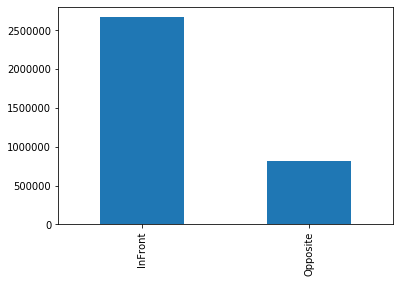

In [253]:
pd.value_counts(df['Violation In Front Of Or Opposite']).plot.bar()

## House Number

**A lot of missing values.**  
Action: Fill with Unknown

In [254]:
df['House Number'].isna().any()

True

In [255]:
len(df[df['House Number'].isna()])

1517393

In [256]:
df['House Number'].unique()

array(['21', '545', '509', ..., '32-94', '1380-82', '2287-92'],
      dtype=object)

## Street Name

**Few missing values.**  
Action: Fill with Unknown

In [257]:
df['Street Name'].isna().any()

True

In [258]:
len(df[df['Street Name'].isna()])

624

In [259]:
df['Street Name'].unique()

array(['OLD BROADWAY', 'W 126 STREET', 'W 125 ST', ..., 'Manee Ave',
       'Dryden Ct', 'Harkness Ave'], dtype=object)

## Intersecting Street

**A lot of missing values.**  
Action: Fill with 'NULL'; because maybe there is no intersecting street.

In [260]:
df['Intersecting Street'].isna().any()

True

In [261]:
len(df[df['Intersecting Street'].isna()])

3002307

In [262]:
df['Intersecting Street'].unique()

array([nan, 'GOLD', 'GOLD STREET', ..., '135ft N/of West St',
       '50ft S/of 4th Ave', '100ft S/of W 54th St'], dtype=object)

## Date First Observed

**Mostly missing values (represented as 0).**  
Action: Fill with the value of `Issue Date`. 

In [263]:
df['Date First Observed'].isna().any()

False

In [264]:
len(df[(df['Date First Observed'] == '0') | (df['Date First Observed'] == 0)])

4927538

**All the dates are in a very bad format (e.g., 20,190,625). Which is basically %Y%m%d but with some commas in the middle.**

In [265]:
not_missing_dfo = df[(df['Date First Observed'] != '0') & (df['Date First Observed'] != 0)]['Date First Observed']
not_missing_dfo.str.contains(r'^\d{2},\d{3},\d{3}$').all()

True

In [266]:
date_first_observed_df = pd.to_datetime(df['Date First Observed'].str.replace(',', ''), errors='coerce', format='%Y%m%d')

In [267]:
date_first_observed_df.count()

56496

## Law Section

**No missing values.**  

In [268]:
df['Law Section'].isna().any()

False

In [269]:
df['Law Section'].unique()

array(['408', '1,111', '1,180', 408, '0'], dtype=object)

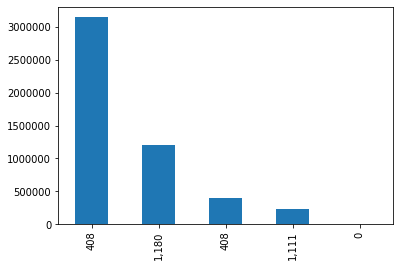

In [270]:
pd.value_counts(df['Law Section']).plot.bar()

## Sub Division

**Very few missing values.**  
Action: Fill with `Unknown`

In [271]:
df['Sub Division'].isna().any()

True

In [272]:
len(df[df['Sub Division'].isna()])

1174

In [273]:
df['Sub Division'].unique()

array(['D1', 'F1', 'F2', 'C', 'E2', 'D', 'E9', 'C3', 'C4', 'E3', 'J6',
       'M1', 'B', 'K2', 'F7', 'E5', '5', 'D5', 'J3', 'E4', 'F3', 'J5',
       'K6', 'K4', 'M2', '99', 'J2', 'I3', 'C8', 'K5', 'J7', 'H2', 'F4',
       'E6', 'D3', 'D4', 'F6', 'L2', 'E1', 'I4', 'F5', 'A1', 'H8', 'M5',
       nan, 'N1', 'N2', 'C5', 'N8', 'I', 'O3', 'C1', 'G2', 'E8', 'K7',
       'N5', 'L', 'C7', 'K1', 'D2', 'J4', 'H1', 'H0', 'C2', 'L4', 'P1',
       'D7', 'K3', 'H3', 'L3', 'H5', 'E7', 'J9', 'C6', '11', 'G3'],
      dtype=object)

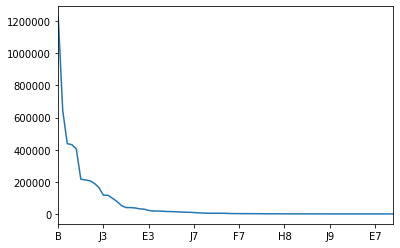

In [274]:
pd.value_counts(df['Sub Division']).plot()

## Violation Legal Code

**A lot of missing values.**  
Action: DROP. The data is not useful as shown below.

In [275]:
df['Violation Legal Code'].isna().any()

True

In [276]:
len(df[df['Violation Legal Code'].isna()])

3547381

In [277]:
df['Violation Legal Code'].unique()

array([nan, 'T', '0'], dtype=object)

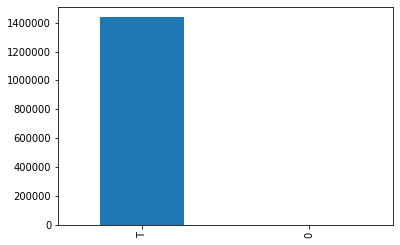

In [278]:
pd.value_counts(df['Violation Legal Code']).plot.bar()

## Days Parking In Effect

**A lot of missing values.**  
Action: DROP. I have no idea what does this mean. I can't find any explanation for it.

In [279]:
df['Days Parking In Effect    '].isna().any()

True

In [280]:
len(df[df['Days Parking In Effect    '].isna()])

1436712

In [281]:
df['Days Parking In Effect    '].unique()

array(['BYBBYBB', 'BBBBBBB', 'YYYYYBB', 'YBBYBBB', 'YYYYYYY', 'YYYYYYB',
       'YBBBYBB', 'BBBBYBB', 'BYBBBBB', 'BBBYBBB', 'YBBBBBB', 'YBYYYBB',
       'BBBBBYB', 'BBBBBYY', 'YBYBYBB', 'BBYBBBB', 'YYBYBBB', 'BYBYBYB',
       'BBBBBBY', nan, 'BBBBYYY', 'YYBYYBB', 'BBBBYYB', 'BYYBBBB',
       'YYYYBBB', 'YYYYBYB', 'YBBYYBB', 'BYBBYYB', 'BYYYYBB', 'YYBBYBB',
       'BYYBYBB', 'BYYYYYB', 'BYBYYBB', 'BYYYYYY', 'BBYBBYY', 'YYYYYBY',
       'YYYBYBY', 'YYBYYBY', 'BYBYBBB', 'BYBBBYB', 'BBBYYBB', 'BBYYBBB',
       'YYYBYYB', 'YBBYBBY', 'BBYBBYB', 'BBYYYYB', 'YYBYYYB', 'YYYYBYY',
       'YYBBBBB', 'YBYYYYB', 'BBBBYBY', 'BYBBYYY', 'YBBBBBY', 'YBYYBBB',
       'YYBYBYB', 'BYBBBYY', 'BYBBYBY', 'YBBBBYY', 'YYYBYBB', 'YBYBYYB',
       'YBBYBYY', 'YBYBBBB', 'YBYBBYB', 'BYYYBYB', 'BYBYYYB', 'YBBYBYB',
       'BYYYBBB', 'YBBBBYB', 'BBYBBBY', 'BYYBYYB', 'BBBYBYY', 'YBYBYBY',
       'BYBYBBY', 'YBBYYBY', 'BBBYYYB', 'YBBBYBY', 'BBBYBBY', 'YBYBBBY',
       'YBBYYYB', '  Y  Y', ' YYYYY', ' YYYYYY', '  Y', '

## From Hours In Effect

**A lot of missing values.** 
Action: DROP

In [282]:
df['From Hours In Effect'].isna().any()

True

In [283]:
len(df[df['From Hours In Effect'].isna()])

2942443

In [284]:
df['From Hours In Effect'].head()

0    0900A
1      ALL
2      ALL
3      ALL
4      ALL
Name: From Hours In Effect, dtype: object

## To Hours In Effect

**A lot of missing values.** 
Action: DROP

In [285]:
df['To Hours In Effect'].isna().any()

True

In [286]:
len(df[df['To Hours In Effect'].isna()])

2942443

## Vehicle Color

**A lot of missing values**

In [287]:
df['Vehicle Color'].isna().any()

True

In [288]:
len(df[df['Vehicle Color'].isna()])

118751

In [289]:
df['Vehicle Color'].unique()

array(['GRY', 'GY', 'BLK', ..., 'BKBLU', 'RD WH', 'BL WH'], dtype=object)

### Mapping vehicle colors
We need to make sure that all vehicle colors are valid. We will use the Vehicle Color dataset for that.

In [290]:
df_vehicle_colors = pd.read_json('Dataset/vehicle_colors.json').set_index('Color Code')

In [291]:
df_vehicle_colors.head()

,Color Description
Color Code,
BK,Black
BL,Blue
BR,Brown
GL,Gold
GY,Gray


In [292]:
df_with_mapped_vehicle_colors = df.join(df_vehicle_colors, on='Vehicle Color')

In [293]:
len(df_with_mapped_vehicle_colors[df_with_mapped_vehicle_colors['Color Description'].isna()])

1665080

**A lot of unknown colors**.  
Action: *For known colors:* Map to the name of the color. *For unknown colors:* Map to Unknown. Also, rely on the latest Known color for the same vehicle.

In [294]:
df_with_mapped_vehicle_colors[df_with_mapped_vehicle_colors['Color Description'].isna()]['Vehicle Color'].unique()

array(['GRY', 'BLK', nan, ..., 'BKBLU', 'RD WH', 'BL WH'], dtype=object)

## Unregistered Vehicle?

**All are missing values.**  
Action: DROP

In [295]:
df['Unregistered Vehicle?'].isna().any()

True

In [296]:
len(df[df['Unregistered Vehicle?'].isna()])

4635092

In [297]:
df['Unregistered Vehicle?'].unique()

array([ 0., nan])

## Vehicle Year

**Alot of missing values (represented as 0).**  
Action: Look for the latese non-null value, NULL if not found.

In [298]:
df['Vehicle Year'].isna().any()

False

In [299]:
len(df[df['Unregistered Vehicle?'] == 0])

348942

In [300]:
df['Vehicle Year'].head()

0       0
1       0
2    2019
3    2015
4       0
Name: Vehicle Year, dtype: int64

## Meter Number

**Mostly missing values.**  
Action: DROP

In [301]:
df['Meter Number'].isna().any()

True

In [302]:
len(df[df['Meter Number'].isna()])

4622698

In [303]:
df['Meter Number'].unique()

array(['-', nan, '113-3066', ..., '319-3098', '409-3087', '143-3756'],
      dtype=object)

## Feet From Curb

**Mostly missing values. (Represented as 0)**  
Action: DROP

In [304]:
df['Feet From Curb'].isna().any()

False

In [305]:
len(df[df['Feet From Curb'] == 0])

4881513

In [306]:
df['Feet From Curb'].unique()

array([ 0,  1,  3,  2,  5, 10,  8,  7,  6,  4, 16, 12, 11,  9, 13, 15, 14])

## Violation Post Code

**Mostly missing values.**  
Action: DROP

In [307]:
df['Violation Post Code'].isna().any()

True

In [308]:
len(df[df['Violation Post Code'].isna()])

1785590

In [309]:
df['Violation Post Code'].dropna().head()

38010    31
38011    31
38012    63
38013    63
38014    63
Name: Violation Post Code, dtype: object

## Violation Description

**Mostly missing values.**  
Action: DROP especially since we can get the correct description from the Violation Codes Dataset!

In [310]:
df['Violation Description'].isna().any()

True

In [311]:
len(df[df['Violation Description'].isna()])

3547168

In [312]:
df['Violation Description'].dropna().head()

2221    BUS LANE VIOLATION
2481    BUS LANE VIOLATION
2771    BUS LANE VIOLATION
2869    BUS LANE VIOLATION
3062    BUS LANE VIOLATION
Name: Violation Description, dtype: object

## No Standing or Stopping Violation

**All are missing values.**  
Action: DROP

In [313]:
df['No Standing or Stopping Violation'].isna().any()

True

In [314]:
len(df[df['No Standing or Stopping Violation'].isna()])

4984034

In [315]:
df['No Standing or Stopping Violation'].unique()

array([nan])

## Hydrant Violation

**All are missing values.**  
Action: DROP

In [316]:
df['Hydrant Violation'].isna().any()

True

In [317]:
len(df[df['Hydrant Violation'].isna()])

4984034

In [318]:
df['Hydrant Violation'].unique()

array([nan])

## Double Parking Violation

**All are missing values.**  
Action: DROP

In [319]:
df['Double Parking Violation'].isna().any()

True

In [320]:
len(df[df['Double Parking Violation'].isna()])

4984034

In [321]:
df['Double Parking Violation'].unique()

array([nan])